In [78]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler
import hvplot.pandas
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [102]:
# Read the CSV file from the Resources folder into a Pandas DataFrame

total_retail_df = pd.read_csv(Path("E-Commerce_Total_Retail.csv"), parse_dates=True, index_col="quarter", infer_datetime_format=True)
total_retail_df = total_retail_df.dropna()

# Review the DataFrame
total_retail_df.head()


,total_retail_sales,total_e-commerce_sales,e-commerce_percentage,real_disposable_income,real_disposable_income_percentage,personal_saving_percentage_rdi,financial_obligations_percentage_rdi,national_unemployment_rate,vacancy_general_retail,mall_vacancies_percentage,vacancy_power_centers,vacancy_shopping_centers,positve_e-commerce_change
quarter,,,,,,,,,,,,,
2023-06-30,1832564,269517,14.71,16786,6.23,3.8,14.4534,3.5,2.5,9.0,4.2,5.3,0
2023-03-31,1680614,252773,15.04,16771,6.63,5.2,14.4534,3.4,2.5,8.8,4.6,5.4,0
2022-12-31,1857200,303120,16.32,16602,5.48,4.8,14.4890,3.4,2.5,8.9,4.4,5.4,0
2022-09-30,1791403,252107,14.07,16224,6.44,3.2,14.6865,3.7,2.6,8.9,4.6,5.6,1
2022-06-30,1823059,250341,13.73,16109,6.43,3.2,14.6245,3.5,2.6,8.6,4.8,5.7,0


In [133]:
# Sales Figures
total_sales_df = total_retail_df['total_retail_sales']
total_e_commerce = total_retail_df["total_e-commerce_sales"]

total_sales_df.hvplot.bar(title="Total Sales vs. e-Commerce Sales",
    xlabel="period",
    ylabel="percentage_%",
    rot=45,
    width=1100,
    yformatter = '%.0f',
    ylim = (20000, 1900000),                       
    height=500
) * total_e_commerce.hvplot.bar(
    xlabel="period",
    ylabel="percentage_%",
    rot=45,
    width=1100,
    yformatter = '%.0f',
    ylim = (20000, 1900000), 
    height=500
)


:Overlay
   .Bars.Total_retail_sales                  :Bars   [quarter]   (total_retail_sales)
   .Bars.Total_e_hyphen_minus_commerce_sales :Bars   [quarter]   (total_e-commerce_sales)

In [80]:
# Separate the y variable, labels
income_comp_percentage = total_retail_df.drop(columns=["total_retail_sales", "total_e-commerce_sales", "real_disposable_income", "national_unemployment_rate", "mall_vacancies_percentage", "vacancy_shopping_centers", "vacancy_power_centers", "vacancy_general_retail", "positve_e-commerce_change"])


# Review 
income_comp_percentage.head()


,e-commerce_percentage,real_disposable_income_percentage,personal_saving_percentage_rdi,financial_obligations_percentage_rdi
quarter,,,,
2023-06-30,14.71,6.23,3.8,14.4534
2023-03-31,15.04,6.63,5.2,14.4534
2022-12-31,16.32,5.48,4.8,14.4890
2022-09-30,14.07,6.44,3.2,14.6865
2022-06-30,13.73,6.43,3.2,14.6245


In [81]:
# Plot the income comparisons via hvPlot
income_comp_percentage.hvplot(
    title="Personal Cash Flow Percentages",
    xlabel="period",
    ylabel="percentage_%",
    rot=90,
    width=1100,
    height=350
)

:NdOverlay   [Variable]
   :Curve   [quarter]   (value)

In [82]:
# Bring in unemployment data and plot unemployment metrics 
unemployment_df = total_retail_df.drop(columns=["total_retail_sales", "total_e-commerce_sales", "real_disposable_income", "mall_vacancies_percentage", "vacancy_shopping_centers", "vacancy_power_centers", "vacancy_general_retail", "positve_e-commerce_change", "financial_obligations_percentage_rdi"])

unemployment_df.hvplot(
    title="Real Disposable Income",
    xlabel="period",
    ylabel="percentage_%",
    rot=90,
    width=1100,
    height=450
)

:NdOverlay   [Variable]
   :Curve   [quarter]   (value)

In [67]:
# Isolate Vacancies & Read CSV File
retail_vacancies_df = pd.read_csv(Path("Vacancies_Total_Retail.csv"), parse_dates=True, index_col="quarter", infer_datetime_format=True)

# Drop NA;s
retail_vacancies_df = retail_vacancies_df.dropna()

retail_vacancies_df.head()


,e-commerce_percentage,general_retail,malls,power_centers,shopping_centers
quarter,,,,,
2023-06-30,14.71,2.5,9.0,4.2,5.3
2023-03-31,15.04,2.5,8.8,4.6,5.4
2022-12-31,16.32,2.5,8.9,4.4,5.4
2022-09-30,14.07,2.6,8.9,4.6,5.6
2022-06-30,13.73,2.6,8.6,4.8,5.7


In [68]:
#Plot the vacancies in comparison to e-commerce sales growth
retail_vacancies_df.hvplot(
    title="Total Retail Vacancies vs. e-Commerce Percentage of Retail Sales",
    xlabel="period",
    ylabel="percentage_%",
    rot=90,
    width=1100,
    height=450
)


:NdOverlay   [Variable]
   :Curve   [quarter]   (value)

In [74]:
# Highlight quartely change metrics. Identify, if any, correlation using heatmaps
e_commerce_quarterly = total_retail_df.drop(columns=["total_retail_sales", "total_e-commerce_sales", "real_disposable_income", "positve_e-commerce_change"]).dropna()

# Understand datatypes for float, int, or strings
e_commerce_quarterly.info()

# Calculate the quartely delta in the datasets, must sort by index in order to perform pct_change() 
e_commerce_quarterly = e_commerce_quarterly.sort_index(ascending=True)
e_commerce_quarterly

#e_commerce_qtrly_delta = e_commerce_quarterly.pct_change()
e_commerce_qrtly_delta = e_commerce_quarterly.pct_change().dropna()

#e_commerce_qtrly_delta.head()
e_commerce_qrtly_delta.head()


,e-commerce_percentage,real_disposable_income_percentage,personal_saving_percentage_rdi,financial_obligations_percentage_rdi,national_unemployment_rate,vacancy_general_retail,mall_vacancies_percentage,vacancy_power_centers,vacancy_shopping_centers
quarter,,,,,,,,,
2018-06-30,-0.019587,-0.055060,0.081967,-0.003143,-0.050000,0.000000,0.045455,0.022727,-0.014925
2018-09-30,0.017758,-0.003150,0.090909,-0.003018,0.000000,-0.066667,0.000000,0.022222,-0.030303
2018-12-31,0.218103,-0.214060,0.138889,-0.003163,0.052632,0.071429,0.043478,0.021739,-0.015625
2019-03-31,-0.113697,0.282412,-0.109756,0.003180,-0.100000,0.000000,0.062500,0.021277,0.000000
2019-06-30,-0.020202,-0.078370,-0.041096,-0.000102,0.027778,-0.033333,0.058824,0.020833,0.000000


In [75]:
# identify correlations and plot the correlations
correlation = e_commerce_qrtly_delta.corr()
correlation


,e-commerce_percentage,real_disposable_income_percentage,personal_saving_percentage_rdi,financial_obligations_percentage_rdi,national_unemployment_rate,vacancy_general_retail,mall_vacancies_percentage,vacancy_power_centers,vacancy_shopping_centers
e-commerce_percentage,1.000000,-0.787625,0.072093,-0.159891,-0.171570,0.311118,0.260387,-0.146782,0.105236
real_disposable_income_percentage,-0.787625,1.000000,0.316267,-0.160069,0.533612,-0.192534,-0.110887,0.258943,0.035281
personal_saving_percentage_rdi,0.072093,0.316267,1.000000,-0.837410,0.822946,0.108158,0.286036,0.125432,0.146496
financial_obligations_percentage_rdi,-0.159891,-0.160069,-0.837410,1.000000,-0.549820,-0.095300,-0.255846,0.034281,-0.038582
national_unemployment_rate,-0.171570,0.533612,0.822946,-0.549820,1.000000,0.039472,0.281145,0.101776,0.170965
vacancy_general_retail,0.311118,-0.192534,0.108158,-0.095300,0.039472,1.000000,0.497167,0.217938,0.620299
mall_vacancies_percentage,0.260387,-0.110887,0.286036,-0.255846,0.281145,0.497167,1.000000,0.446117,0.752625
vacancy_power_centers,-0.146782,0.258943,0.125432,0.034281,0.101776,0.217938,0.446117,1.000000,0.571660
vacancy_shopping_centers,0.105236,0.035281,0.146496,-0.038582,0.170965,0.620299,0.752625,0.571660,1.000000


<Axes: >

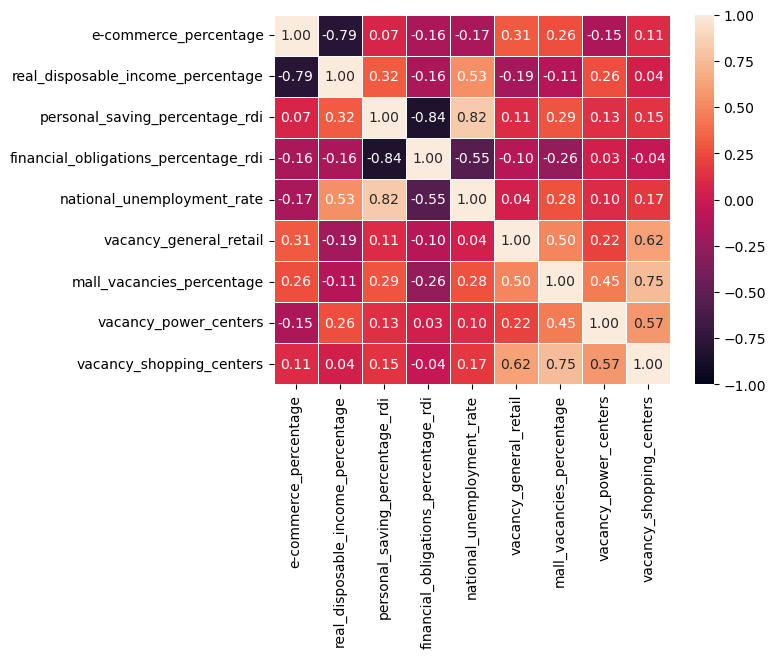

In [83]:
# Using heatmap to plot and visualize the correlation
sn.heatmap(correlation, annot=True, fmt=".2f", linewidth=.5, vmin=-1, vmax=1)

Text(0, 0.5, 'Vacancy Shopping Centers')

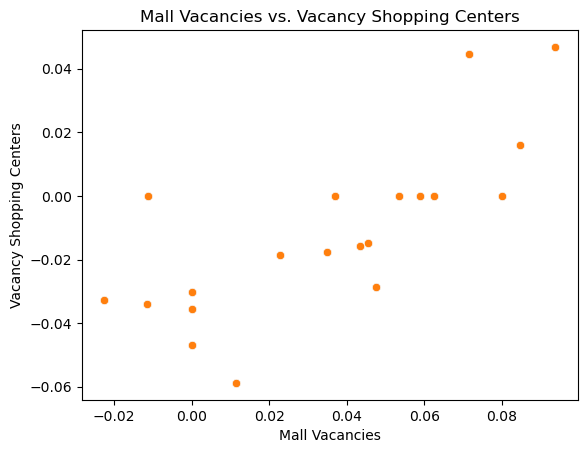

In [157]:
from scipy import stats
sn.scatterplot(x='mall_vacancies_percentage', y='vacancy_shopping_centers', data=e_commerce_qrtly_delta)
ax = sn.scatterplot(x='mall_vacancies_percentage', y='vacancy_shopping_centers', data=e_commerce_qrtly_delta)
ax.set_title("Mall Vacancies vs. Vacancy Shopping Centers")
ax.set_xlabel("Mall Vacancies")
ax.set_ylabel("Vacancy Shopping Centers")


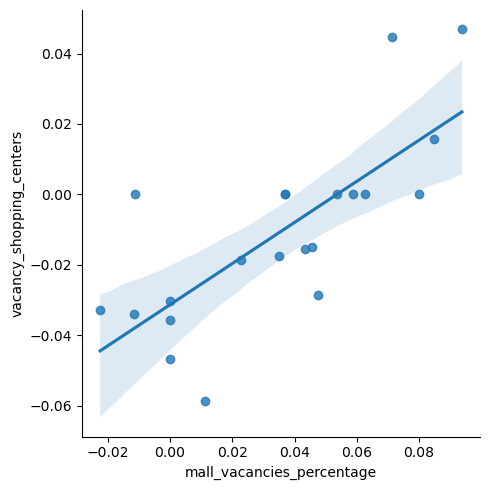

In [158]:
#adding best fit line
sn.lmplot(x='mall_vacancies_percentage', y='vacancy_shopping_centers', data=e_commerce_qrtly_delta)


In [159]:
from scipy import stats
stats.pearsonr(e_commerce_qrtly_delta['mall_vacancies_percentage'], e_commerce_qrtly_delta['vacancy_shopping_centers'])

PearsonRResult(statistic=0.7526254592610209, pvalue=8.269784886883533e-05)

<Axes: >

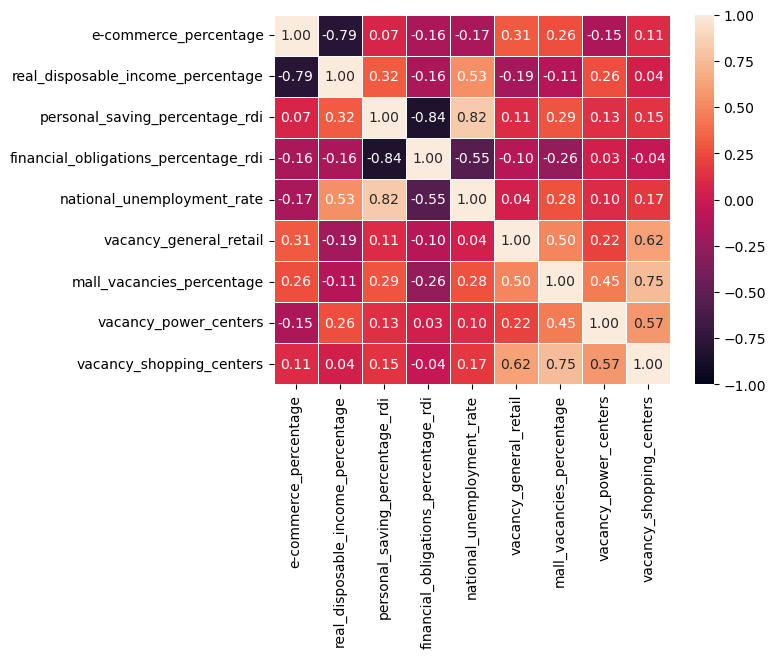

In [156]:
corr_matrix = e_commerce_qrtly_delta.corr()
round(corr_matrix,2)
sn.heatmap(corr_matrix, annot=True, fmt=".2f", linewidth=.5, vmin=-1, vmax=1)

In [ ]:
# References
# https://www.us.jll.com/en/views/retail-right-now--open-air-center-demand-surges-and-vacancy-falls
# https://fred.stlouisfed.org/
